# Construct the forward variance curve for 15-Feb-2023

## Imports

In [58]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from utils import plot_ivols_mc, var_swap_robust
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load volatility smiles from 15-Feb-2023

In [21]:
df_spx = pd.read_parquet("spx_implied_vol_20230215.parquet")
df_spx.head()

,Expiry,Texp,Strike,Bid,Ask,Fwd,CallMid
0,20230216,0.002738,1000.0,NaN,7.793085,4146.741883,NaN
1,20230216,0.002738,1200.0,NaN,6.813266,4146.741883,NaN
2,20230216,0.002738,1400.0,NaN,5.987566,4146.741883,NaN
3,20230216,0.002738,1600.0,NaN,5.273554,4146.741883,NaN
4,20230216,0.002738,1800.0,NaN,4.644049,4146.741883,NaN


Plot SPX smiles as of February 15, 2023.

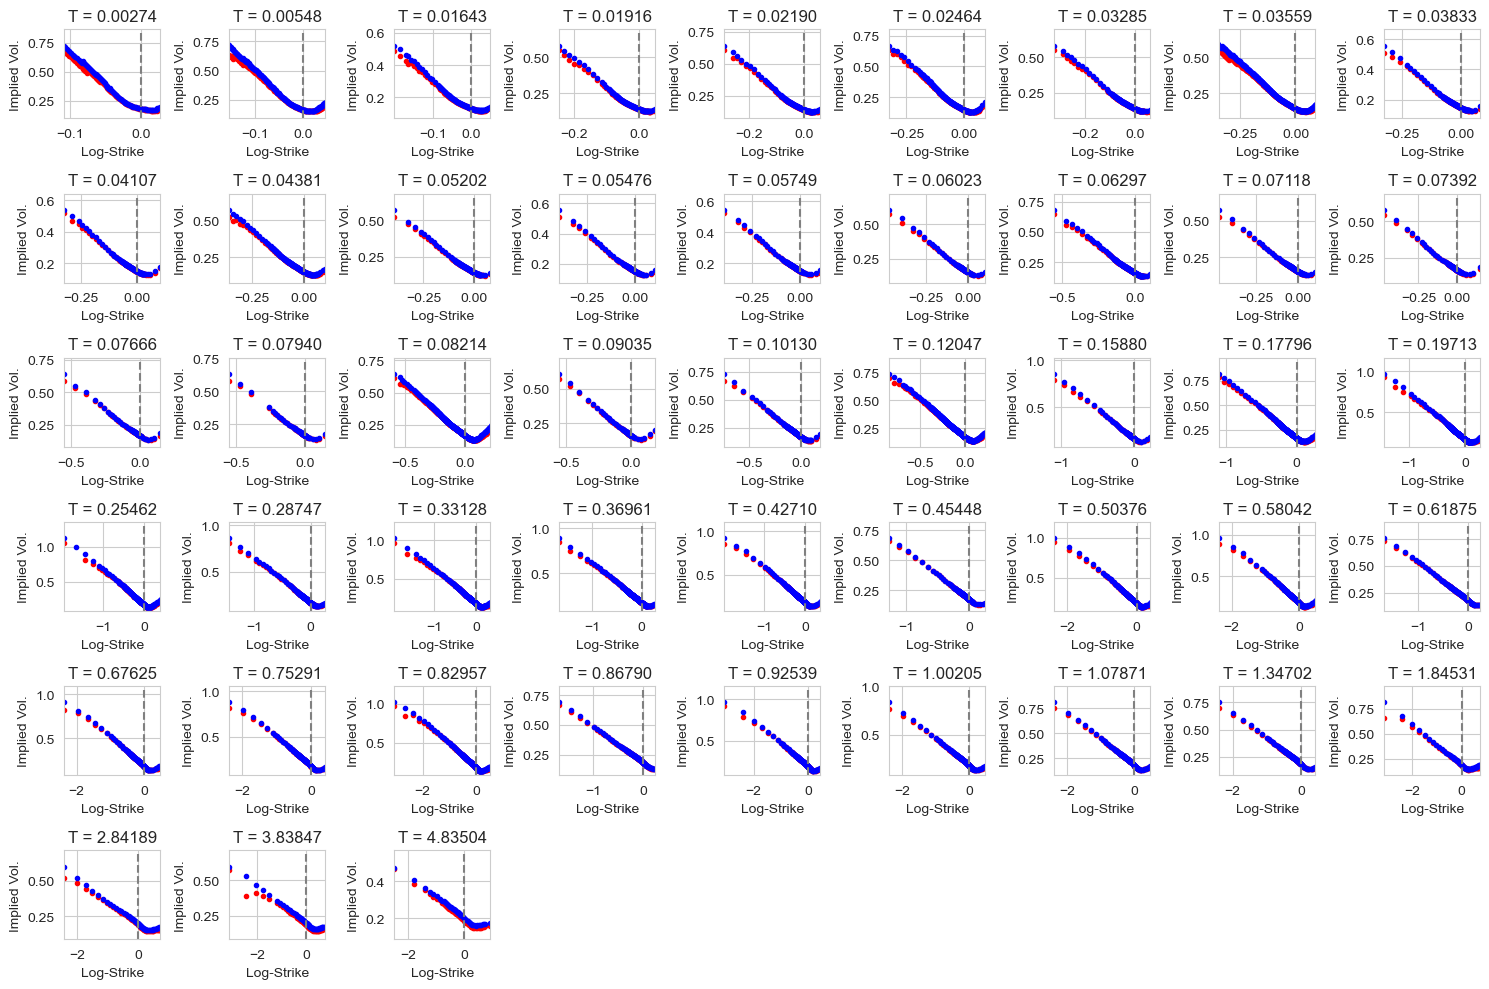

In [22]:
res_plot = plot_ivols_mc(df_spx)

## Robust estimation of the variance contract

In [31]:
df_spx

,Expiry,Texp,Strike,Bid,Ask,Fwd,CallMid
0,20230216,0.002738,1000.0,NaN,7.793085,4146.741883,NaN
1,20230216,0.002738,1200.0,NaN,6.813266,4146.741883,NaN
2,20230216,0.002738,1400.0,NaN,5.987566,4146.741883,NaN
3,20230216,0.002738,1600.0,NaN,5.273554,4146.741883,NaN
4,20230216,0.002738,1800.0,NaN,4.644049,4146.741883,NaN
...,...,...,...,...,...,...,...
7418,20271217,4.835044,8800.0,0.150144,0.165879,4753.733515,34.691419
7419,20271217,4.835044,9200.0,0.152199,0.167741,4753.733515,27.607831
7420,20271217,4.835044,9600.0,0.154315,0.169582,4753.733515,22.219461
7421,20271217,4.835044,10000.0,0.156361,0.171394,4753.733515,18.041960


In [39]:
df_spx.dropna()

,Expiry,Texp,Strike,Bid,Ask,Fwd,CallMid
28,20230216,0.002738,3725.0,0.679096,0.722648,4146.741883,421.816862
29,20230216,0.002738,3730.0,0.671286,0.714413,4146.741883,416.816862
30,20230216,0.002738,3740.0,0.655678,0.697952,4146.741883,406.816862
31,20230216,0.002738,3750.0,0.640086,0.681506,4146.741883,396.816862
32,20230216,0.002738,3760.0,0.624508,0.665073,4146.741883,386.816862
...,...,...,...,...,...,...,...
7418,20271217,4.835044,8800.0,0.150144,0.165879,4753.733515,34.691419
7419,20271217,4.835044,9200.0,0.152199,0.167741,4753.733515,27.607831
7420,20271217,4.835044,9600.0,0.154315,0.169582,4753.733515,22.219461
7421,20271217,4.835044,10000.0,0.156361,0.171394,4753.733515,18.041960


In [45]:
expiries = res_plot["expiries"]
res_vs = var_swap_robust(ivol_data=df_spx)

/Users/florianbourgey/projects/gatheral/QuadraticRoughHeston/Python/utils.py:159: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  


In [ ]:
vs_r_code = np.array(
    [
        0.0365293285073550,
        0.03177762987481590,
        0.0198014368395580,
        0.02162057975984850,
        0.02398171428154790,
        0.02600709336247240,
        0.02304800088713060,
        0.02422691114047310,
        0.02542176218404370,
        0.02626088204329240,
        0.02728127409563520,
        0.02518733179224580,
        0.02708167589544620,
        0.02778900205509510,
        0.02838280785888840,
        0.03078455447047580,
        0.02882813652097490,
        0.03262348632761050,
        0.0330369230412840,
        0.03330855450465970,
        0.03330457782941130,
        0.03215471199799830,
        0.03728563819398170,
        0.03685265626670830,
        0.03840158851108320,
        0.03827288837696980,
        0.03897629872247960,
        0.04221298234078890,
        0.0417663245732760,
        0.04490341471205430,
        0.04532924876175550,
        0.04673886466311310,
        0.0463843062644040,
        0.04938991235307330,
        0.05067168503754370,
        0.05097511488282930,
        0.05258380206886220,
        0.05366169491978110,
        0.05525559147824150,
        0.05284341167449460,
        0.05447486235536680,
        0.05445440381891550,
        0.05493113357235020,
        0.05527497225020560,
        0.05719453730559730,
        0.05678801114856790,
        0.05711121668242890,
        0.059465108018572,
    ]
)


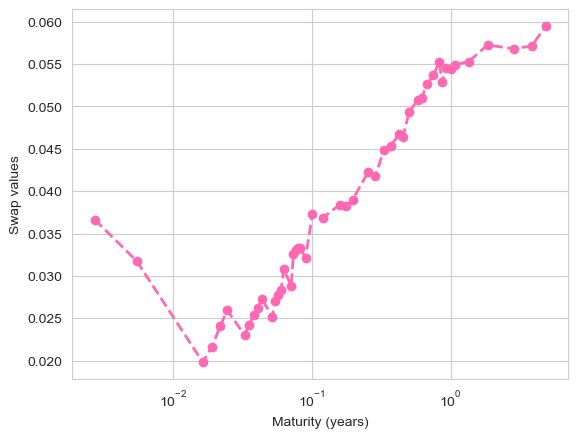

In [62]:
fig, ax = plt.subplots()
ax.plot(
    expiries,
    res_vs["vs_mid"],
    marker="o",
    linestyle="--",
    linewidth=2,
    color="hotpink",
)
ax.set_xlabel("Maturity (years)")
ax.set_ylabel("Swap values")
ax.set_xscale("log")
plt.show()